# Image Processing

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Blending
When stacking 2 or more images on top of one another. Pretty much a weighted sum of pixel values at each pixel + bias
* formula: new_pixel = $\alpha * pixel_1 + \beta * pixel_2 + ... + \gamma$

In [24]:
img1 = cv2.cvtColor(
    cv2.imread('data/dog_backpack.png'), 
    cv2.COLOR_BGR2RGB
)
img2 = cv2.cvtColor(
    cv2.imread('data/watermark_no_copy.png'), 
    cv2.COLOR_BGR2RGB
)

(1401, 934, 3)
(1280, 1277, 3)


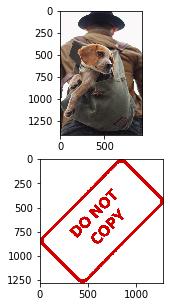

In [13]:
print(img1.shape)
print(img2.shape)
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(211)
ax1.imshow(img1)
ax1 = plt.subplot(212)
ax1.imshow(img2)

### Blending images of same size

In [14]:
# resizing to images of same size for blending
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

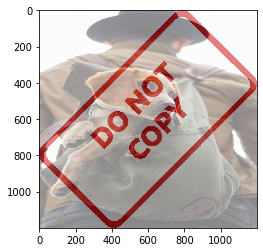

In [16]:
blended = cv2.addWeighted(
    src1=img1,
    alpha=0.5,
    src2=img2,
    beta=0.5,
    gamma=0
)
plt.imshow(blended)

### Blending images of different size
1. Overlay small image on top of large image, simply numpy array reassignment at overlapping elements
2. Blending only at image segments with overlaps, by masking background of small img

#### Overlaying small on large

In [25]:
img2 = cv2.resize(img2, (300, 300))
large_img = img1
small_img = img2

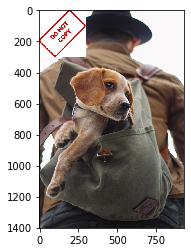

In [22]:
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

#### Blending small on large

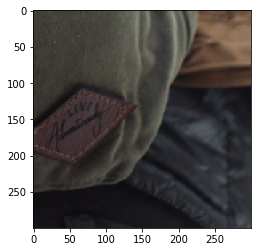

In [27]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]
x_end = large_img.shape[1]
y_end = large_img.shape[0]
roi = large_img[y_offset:y_end, x_offset:x_end]
plt.imshow(roi)

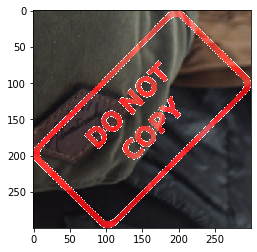

In [38]:
# Grab img2 w/o background
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img2_gray)

# Generate b/w mask across 3 channels, strategy:
# Generate 2x white img & mask em 
# (essentially an 'and' operation with mask) 
# white_bg = np.full(img2.shape, 255, dtype=np.uint8)
mask_rgb = cv2.bitwise_and(small_img, small_img, mask=mask_inv)
final_roi = cv2.bitwise_or(roi, mask_rgb)
plt.imshow(final_roi)

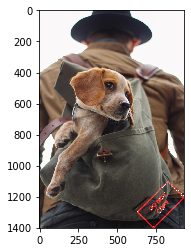

In [39]:
large_img[y_offset:y_end, x_offset:x_end] = final_roi
plt.imshow(large_img)

## Thresholding
Set pixel to obtain a binary value, either 0 (black) or 1 (white), when the original pixel value meets some condition (e.g. exceeds a threshold)

### Simple Thresholding

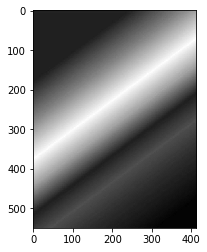

In [41]:
img = cv2.imread('data/rainbow.jpg', 0)
plt.imshow(img, cmap='gray')

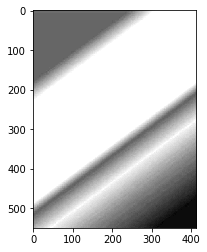

In [44]:
ret, thresh1 = cv2.threshold(
    img, 
    thresh=127, 
    maxval=255, 
    type=cv2.THRESH_TRUNC
)
plt.imshow(thresh1, cmap='gray')

### Adaptive Thresholding

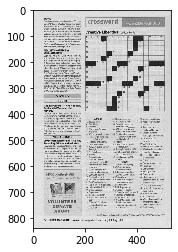

In [46]:
img = cv2.imread('data/crossword.jpg', 0)
plt.imshow(img, cmap='gray')

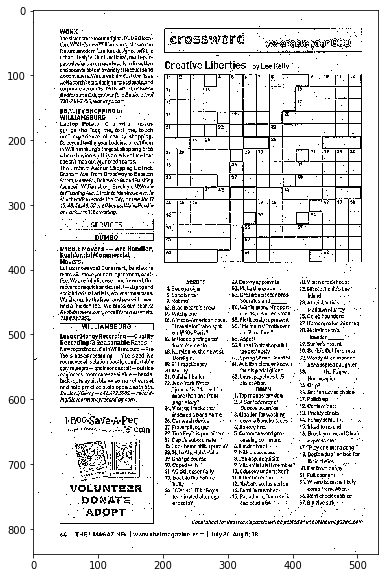

In [54]:
adapt_thresh = cv2.adaptiveThreshold(
    src=img, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY,
    blockSize=5,
    C=8
)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.imshow(adapt_thresh, cmap='gray')

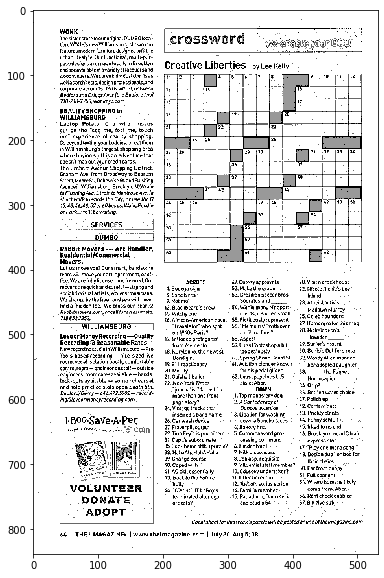

In [58]:
# can try blending with normal thresholding too
_, thresh = cv2.threshold(
    src=img,
    thresh=127,
    maxval=255,
    type=cv2.THRESH_BINARY
)
blended = cv2.addWeighted(
    src1=thresh,
    alpha=0.4,
    src2=adapt_thresh,
    beta=0.6,
    gamma=0
)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.imshow(blended, cmap='gray')

## Blurring & Smoothing